**Import Necessary Libraries**

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
import tensorflow as tf
from matplotlib import pylab as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 25)
pd.set_option("display.max_rows", 25)

print(tf.__version__)
print("Setup complete!")

2.8.0
Setup complete!


**Read in updated DataFrame**

In [2]:
raw = "/DATA/diabetes_data.csv"
diabetes_data = pd.read_csv(raw, sep=";")
diabetes_data 

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [3]:
# getting the information 
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [4]:
# Getting the uniqueness categorical variable
categorical = diabetes_data.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {diabetes_data[cat_col].nunique()} unique values(s)")

gender : 2 unique values(s)


In [5]:
# Getting the uniqueness discrete and continuous variables
numeric = diabetes_data.select_dtypes(["int", "float"]).columns
for num_col in numeric: # print every unique values
    print(f"{num_col} : {diabetes_data[num_col].nunique()} unique values(s)")

age : 51 unique values(s)
polyuria : 2 unique values(s)
polydipsia : 2 unique values(s)
sudden_weight_loss : 2 unique values(s)
weakness : 2 unique values(s)
polyphagia : 2 unique values(s)
genital_thrush : 2 unique values(s)
visual_blurring : 2 unique values(s)
itching : 2 unique values(s)
irritability : 2 unique values(s)
delayed_healing : 2 unique values(s)
partial_paresis : 2 unique values(s)
muscle_stiffness : 2 unique values(s)
alopecia : 2 unique values(s)
obesity : 2 unique values(s)
class : 2 unique values(s)


In [6]:
# Get the features and label form our data
features, label = diabetes_data.drop(columns=["class"]), diabetes_data["class"] 
print(f"Shape: {diabetes_data.shape}") # print-out the car shape
print(f"N-Dimension: {diabetes_data.ndim}") # print-out the car n-dimensional 
print(f"Features Shape: {features.shape}") # print-out the features shape
print(f"Features N-Dimension: {features.ndim}") # print-out the features n-dimension
print(f"Label Shape: {label.shape}") # print-out the label shape
print(f"Label N-Dimension: {label.ndim}") # print-out the label n-dimension

Shape: (520, 17)
N-Dimension: 2
Features Shape: (520, 16)
Features N-Dimension: 2
Label Shape: (520,)
Label N-Dimension: 1


In [7]:
# Get the number of missing data points per column
missing_values_count = diabetes_data.isnull().sum()
# Look at the missing points
missing_values_count.to_frame()

,0
age,0
gender,0
polyuria,0
polydipsia,0
sudden_weight_loss,0
weakness,0
polyphagia,0
genital_thrush,0
visual_blurring,0
itching,0


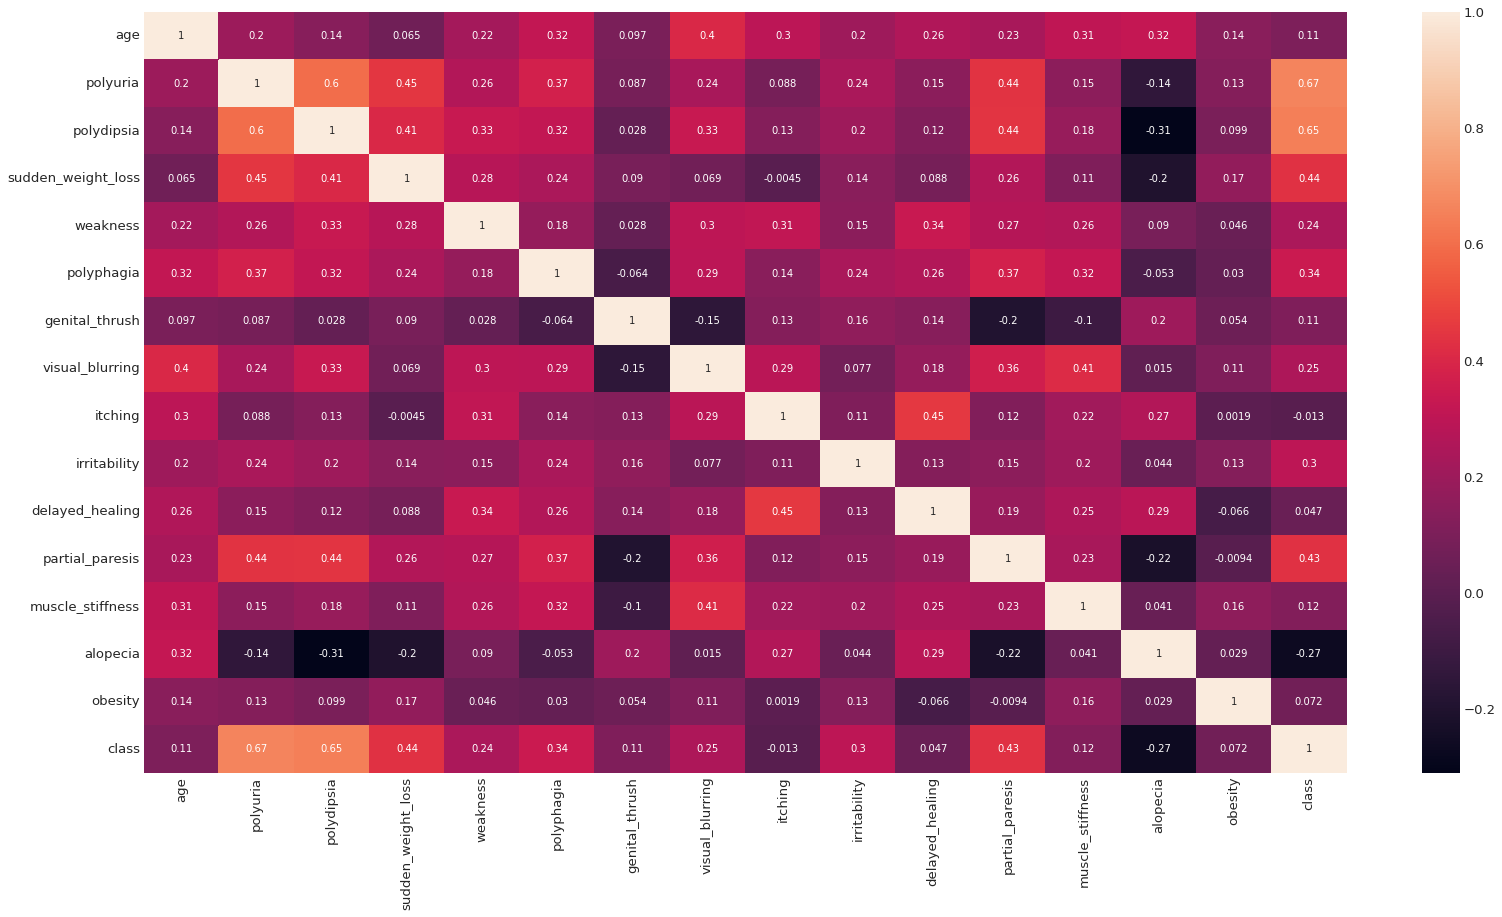

In [8]:
# let's make a correlation matrix
plt.figure(figsize=(24, 14))
sns.heatmap(diabetes_data.corr(), annot=True);

In [9]:
diabetes_data.corr()['class'].sort_values(ascending=False) # the correlation

class                 1.000000
polyuria              0.665922
polydipsia            0.648734
sudden_weight_loss    0.436568
partial_paresis       0.432288
polyphagia            0.342504
irritability          0.299467
visual_blurring       0.251300
weakness              0.243275
muscle_stiffness      0.122474
genital_thrush        0.110288
age                   0.108679
obesity               0.072173
delayed_healing       0.046980
itching              -0.013384
alopecia             -0.267512
Name: class, dtype: float64

In [10]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = diabetes_data.skew().sort_values(ascending=False)
skew_value

obesity               1.769420
genital_thrush        1.334223
irritability          1.206305
alopecia              0.657608
muscle_stiffness      0.517893
sudden_weight_loss    0.336359
age                   0.329359
partial_paresis       0.280426
polydipsia            0.209426
visual_blurring       0.209426
polyphagia            0.178134
delayed_healing       0.162537
itching               0.054022
polyuria              0.015430
weakness             -0.352476
class                -0.475715
dtype: float64

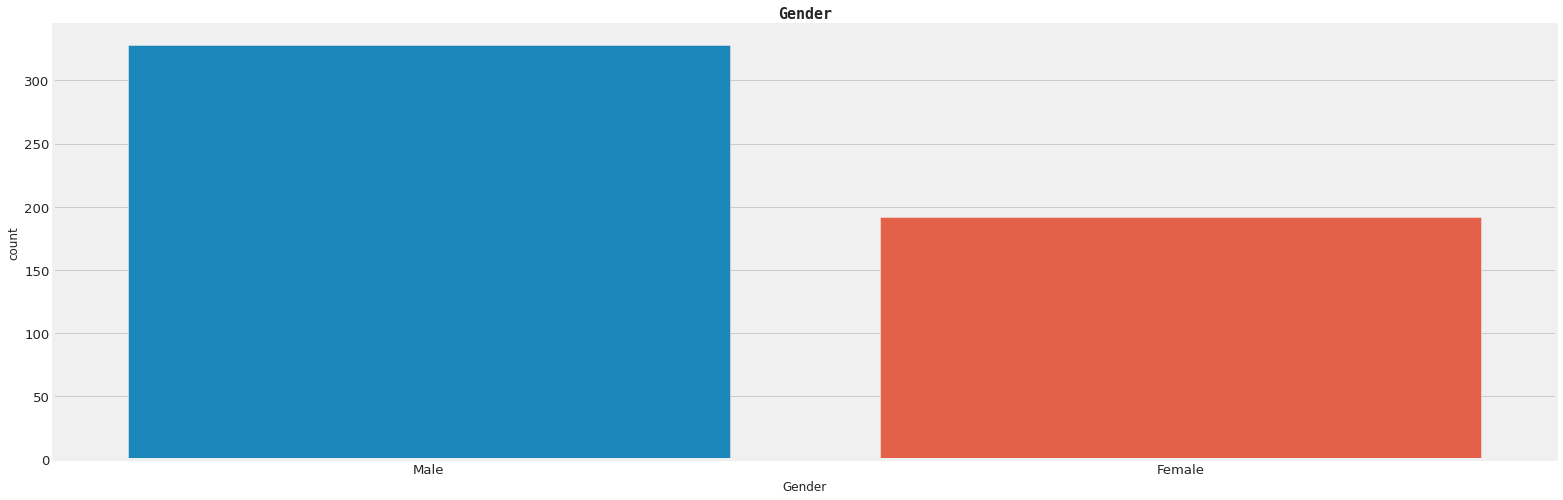

In [11]:
# let's plot it
plt.figure(figsize=(24, 8)) # figuring the size
# makes count plot 
sns.countplot(x='gender', data=diabetes_data)
# title
plt.title('Gender', fontname='monospace', fontweight='bold', fontsize=15)
# x-label
plt.xlabel('Gender');

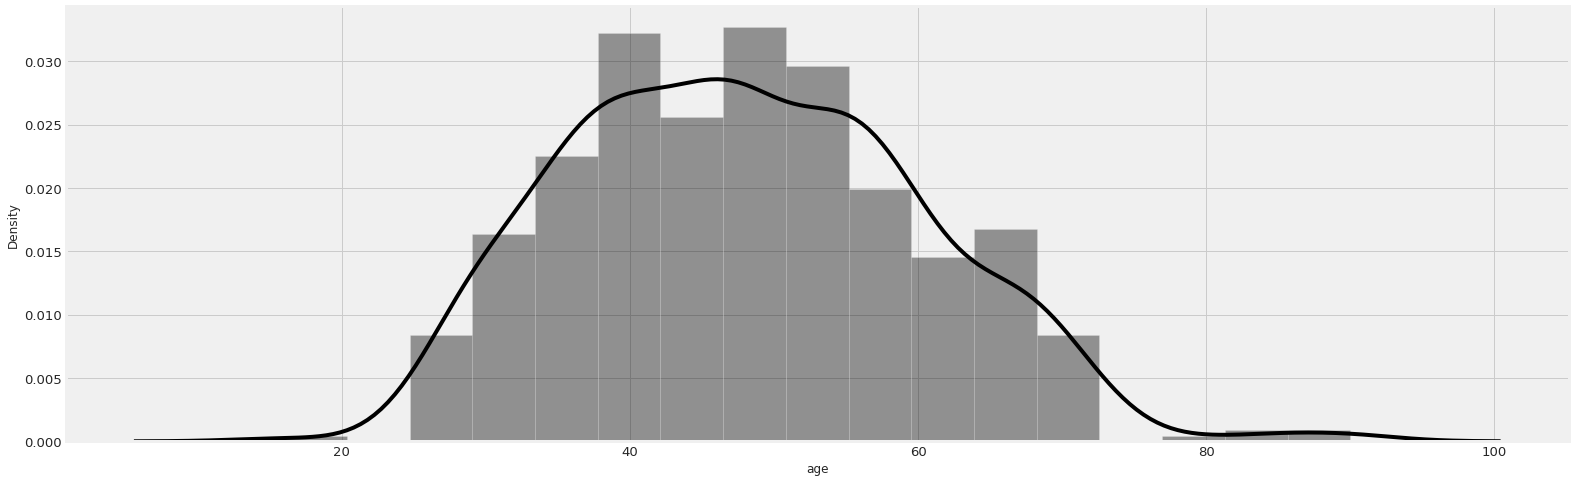

In [12]:
plt.figure(figsize=(24, 8))
sns.distplot(diabetes_data['age'], kde=True, color="black");

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def preprocessing_data(data):
    """Returns Data that have been preprocessed and split"""
    # Create a columns transformer
    features_num = ["polyuria", "age", "polydipsia", "sudden_weight_loss", "weakness", \
                    "polyphagia", "genital_thrush", "visual_blurring", "itching", "irritability", \
                    "delayed_healing", "partial_paresis", "muscle_stiffness", "alopecia", "obesity"]
    features_cat = ['gender']

    preprocessor = make_column_transformer(
        (StandardScaler(), features_num),
        (OneHotEncoder(), features_cat),
    )
    
    # Create X & y (features and label)
    X = data.drop(columns=["class"])
    y = data["class"]
    
    # Build our train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Fit the columns transformer to our training data
    preprocessor.fit(X_train)
    
    # Transform training and test data with normalization (MinMaxScaler) and encoder (OneHotEncoder, LabelEncoder)
    X_train_normal = preprocessor.transform(X_train)
    X_test_normal = preprocessor.transform(X_test)
    
    # X_train and X_test (features)
    X_train, X_test = tf.constant(X_train_normal), tf.constant(X_test_normal)
    
    # y_train and y_test (label)
    y_train, y_test = tf.constant(y_train), tf.constant(y_test)
    
    return X_train, X_test, y_train, y_test

# Call the function
X_train, X_test, y_train, y_test = preprocessing_data(diabetes_data)
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [17]


In [14]:
# Checking the shape and dimension of rows and columns (features)
X_train.shape, X_test.shape, X_train.ndim, X_test.ndim

(TensorShape([416, 17]), TensorShape([104, 17]), 2, 2)

In [15]:
# Checking the shape and dimension of rows and columns (label)
y_train.shape, y_test.shape, y_train.ndim, y_test.ndim

(TensorShape([416]), TensorShape([104]), 1, 1)

In [16]:
# Checking the type (features and label)
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(tf.float64, tf.float64, tf.int64, tf.int64)

In [17]:
# Checking the len (feature and label)
len(X_train), len(X_test), len(y_train), len(y_test)

(416, 104, 416, 104)

In [18]:
# Set the random seed
tf.random.set_seed(42)

def model():
    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation="relu", input_shape=input_shape, name="input_1"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(128, activation="relu", name="input_2"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
    ], name="our_model")

    # Compile the model
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
    
    return model

model = model()

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    verbose=1,
)

Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.5467 - accuracy: 0.7812 - val_loss: 0.3886 - val_accuracy: 0.8558
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9038 - val_loss: 0.2973 - val_accuracy: 0.8846
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2860 - accuracy: 0.8966 - val_loss: 0.2610 - val_accuracy: 0.8846
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.9255 - val_loss: 0.2282 - val_accuracy: 0.8942
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.9279 - val_loss: 0.2101 - val_accuracy: 0.9038
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1690 - accuracy: 0.9399 - val_loss: 0.1950 - val_accuracy: 0.9038
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1567 - accuracy: 0.9471 - val_loss: 0.1878 - val_accuracy: 0.9038
Epoch 8/100


In [19]:
model.summary()

Model: "our_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (Dense)             (None, 128)               2304      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 input_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 18,945
Trainable params: 18,945
Non-trainable params: 0
_________________________________________________________________


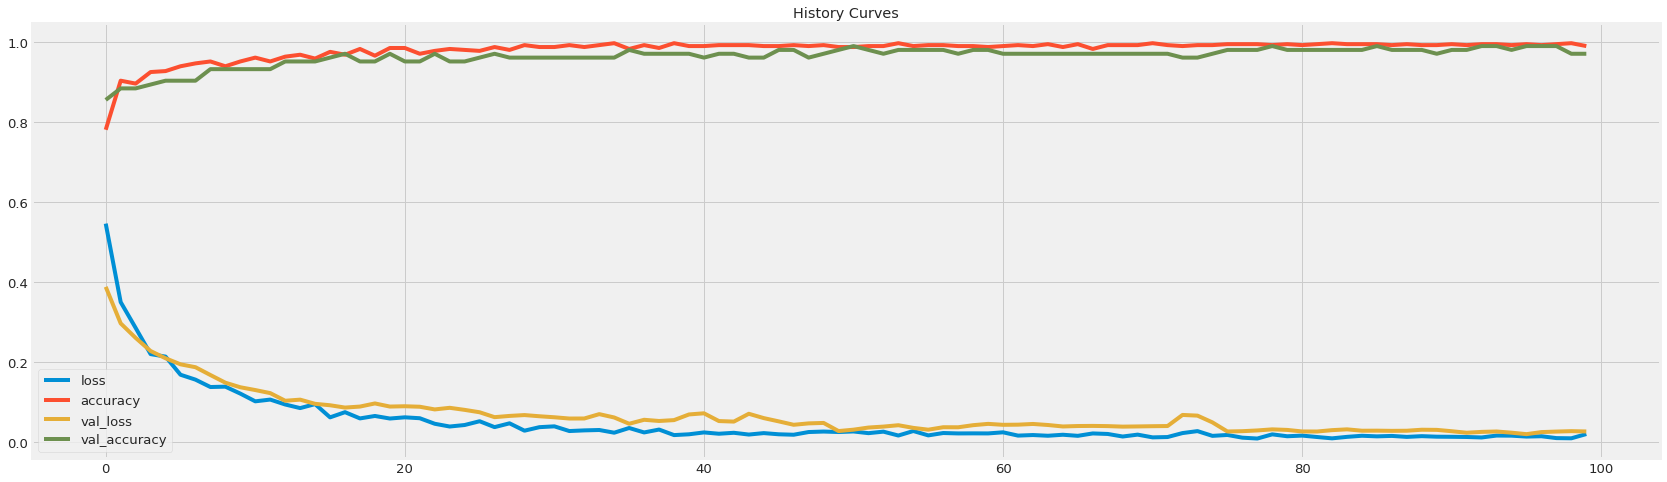

In [20]:
pd.DataFrame(history.history).plot(figsize=(26, 8), title="History Curves");

In [21]:
# Check kthe accuracy of our model
y_pred = model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"y_pred: {y_pred[0]}")
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

4/4 [==============================] - 0s 5ms/step - loss: 0.0272 - accuracy: 0.9712
y_pred: [1.456976e-07]
Model loss on the test set: 0.027164407074451447
Model accuracy on the test set: 97.12%


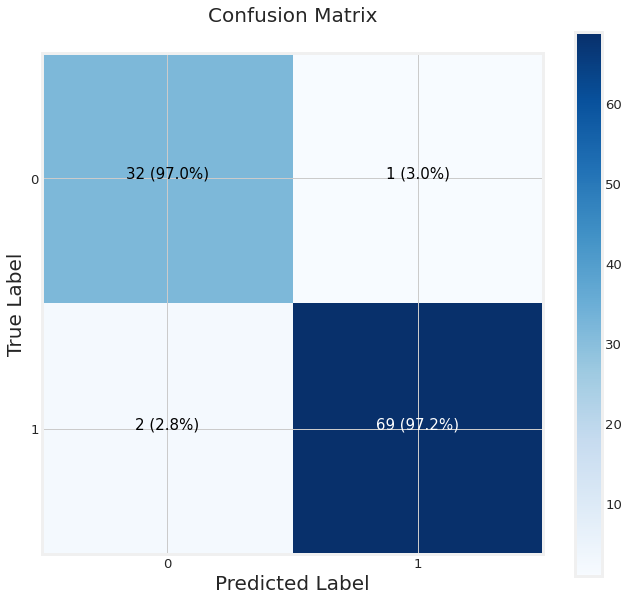

In [22]:
# Note: the confusion matrix code we're about to ride is a remix of scikit-learn's plot confusion matrix function
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it 
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes= False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(
    title='Confusion Matrix',
    xlabel='Predicted Label',
    ylabel='True Label',
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for diffenrent colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15);
fig.show();

In [23]:
from tensorflow import keras,lite

In [24]:
keras_file = "model.h5"
tf.keras.models.save_model(model,keras_file)
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

open("model.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmp4eolnjf_/assets


77620

In [25]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://9f30fac6-9fda-4107-94d3-ef5e6e87abd1/assets


INFO:tensorflow:Assets written to: ram://9f30fac6-9fda-4107-94d3-ef5e6e87abd1/assets
